# Group 32 Final Project

* Group members:

### Preparation

Load libraries and dataset.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Load data as Data Frame - unicode_escape
df = pd.read_csv("News Sentiment Analysis for Stock Data by Company.csv", encoding="latin-1")

## Quick View of the Data Set

Whether there is empty data in our data set.

In [3]:
df

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...


In [4]:
for column in df:
    print("The column", column, "has", df[column].isnull().sum(), "empty data.")

The column Label has 0 empty data.
The column Ticker has 0 empty data.
The column Headline has 0 empty data.


## Quick Visualization

* 0 -> The stock went down by market close the day the article was published (negative)
* 1 -> The stock went up by market close the day the article was published (positive)
* 2 -> The stock stayed the same by market close the day the article was published (neutral)

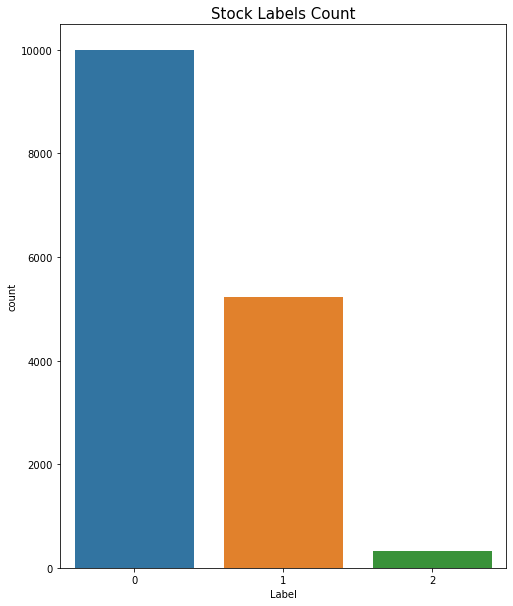

In [5]:
plt.figure(figsize=(8, 10))
sns.countplot(x=df['Label'])
plt.title("Stock Labels Count", fontsize=15)
plt.show()

## Preprocess Headlines

Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

Store the result in a list.

In [56]:
def clean_headline(headline):
    """
    Clean Headlines. Remove links, punctuations, stopwords and many other words that don’t give a lot of meanings. Lowercase the headlines. Perform stemming operation so that similar words are reduced.

    Input:
        headline: A string of the headline.
    Output:
        tokens: a list of words containing the processed headline.

    """

    # remove links (use 'r' to represent raw strings)
    headline = re.sub(r'(https?://)?(www\.)?\S*\.\S*\s*', ' ', headline).strip()
    # remove punctuations using regular expression, and convert letters to lowercase
    headline = re.sub(r'[^\w\s]', '', headline).lower()
    # tokenization
    tokens = word_tokenize(headline)
    # remove stopwords
    sw = stopwords.words("english")
    tokens = [t for t in tokens if t not in sw]
    # stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    # lemmatization
    #wnl = nltk.WordNetLemmatizer()
    #tokens = [wnl.lemmatize(t) for t in tokens]

    return tokens

In [58]:
# Use a list to store separate words of cleaned headlines
cleaned_headlines = []

# Add cleaned headlines to data frame as strings.
for i in range(len(df)):
    tokens = clean_headline(df.loc[i, "Headline"])
    df.loc[i, 'Cleaned_Headline'] = " ".join(tokens)
    cleaned_headlines.append(tokens)

In [59]:
# Display the cleaned headlines
df

,Label,Ticker,Headline,Cleaned_Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,totestravel airlin share tumbl new york impos ...
1,1,A,@TotesTravel : American United call off Hong K...,totestravel american unit call hong kong fligh...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,totestravel airlin stock hit highest price sin...
3,1,A,@TotesTravel : American Airlines reaches deal ...,totestravel american airlin reach deal boe 737...
4,1,A,@TotesTravel : US airlines Treasury Department...,totestravel us airlin treasuri depart reach ag...
...,...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...,walmart dump ecigarett largest store us longer...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...,walmart make 16 billion bet india boom economi
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...,walmart rais minimum age buy tobacco 21 pressu...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...,walmart took chile three year countri terrifi ...


## LSTM

### Convert Word to Vector

In [9]:
import gensim
from sklearn.model_selection import train_test_split

In [10]:
# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(cleaned_headlines, vector_size=200)
# word2vec_model = gensim.models.Word2Vec(cleaned_headlines)

In [11]:
word2vec_model.wv['iraq']

array([-3.68495728e-03, -1.42711788e-01, -1.43880965e-02, -6.89845011e-02,
        2.21842438e-01, -1.15926154e-01, -8.00349377e-03,  2.03734294e-01,
        6.14172854e-02,  2.70389114e-02,  2.32552830e-03, -4.10661846e-02,
       -1.51810601e-01,  2.50985492e-02, -6.49104938e-02, -2.56144032e-02,
       -1.75216302e-01, -6.59987926e-02,  7.22930208e-02, -3.81687522e-01,
        2.54164319e-02, -2.60732751e-02,  5.10976464e-02,  9.24071893e-02,
        8.42153504e-02, -5.81790833e-03,  7.58136585e-02, -1.19651489e-01,
       -2.40196779e-01,  9.84637961e-02,  6.52850568e-02, -7.47301802e-02,
        1.91851556e-01, -1.71020970e-01,  7.43568838e-02,  1.94058493e-02,
        6.15511984e-02, -4.97203134e-02, -6.25456646e-02, -1.67156249e-01,
       -1.01968698e-01,  1.79721264e-03, -4.61149886e-02, -6.16561323e-02,
        4.12493259e-01, -2.19832495e-01,  4.42324579e-02, -3.89584415e-02,
        1.43746629e-01,  2.64958501e-01, -1.25876432e-02, -3.18423919e-02,
       -9.22328159e-02, -

In [12]:
# Convert words to vectors
word_vectors = []
cnt = 0
cnt_missed = 0

for headline in cleaned_headlines:
    headline_vec = []
    for word in headline:
        cnt += 1
        try:
            headline_vec.append(word2vec_model.wv[word])
        except:
            cnt_missed += 1
            # print(word, " Not in word vectors.")
    word_vectors.append(headline_vec)

In [13]:
print(cnt_missed / cnt, "of words are missed in the word vectors.")

0.10255385476199992 of words are missed in the word vectors.


### Prepare data set

In [42]:
import torch
from torchtext.legacy import data
import random

In [40]:
seed=1453
torch.manual_seed(seed)
torch.backends.cudnn.deterministic=True

In [47]:
HEADLINE = data.Field(tokenize='spacy',batch_first=True,include_lengths=True)
LABEL = data.LabelField(dtype = torch.float,batch_first=True)
fields = [(None, None), ('headline',HEADLINE),('label', LABEL)]

In [60]:
df

,Label,Ticker,Headline,Cleaned_Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...,totestravel airlin share tumbl new york impos ...
1,1,A,@TotesTravel : American United call off Hong K...,totestravel american unit call hong kong fligh...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...,totestravel airlin stock hit highest price sin...
3,1,A,@TotesTravel : American Airlines reaches deal ...,totestravel american airlin reach deal boe 737...
4,1,A,@TotesTravel : US airlines Treasury Department...,totestravel us airlin treasuri depart reach ag...
...,...,...,...,...
15557,0,WMT,Walmart dumps e-cigarettes: Largest store in U...,walmart dump ecigarett largest store us longer...
15558,0,WMT,Walmart makes a $16 billion bet on India's boo...,walmart make 16 billion bet india boom economi
15559,0,WMT,Walmart raises minimum age to buy tobacco to 2...,walmart rais minimum age buy tobacco 21 pressu...
15560,0,WMT,Walmart Took Over Chile In Only Three Years An...,walmart took chile three year countri terrifi ...


In [69]:
# Prepare training and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_headlines, df['Label'], test_size=0.2, random_state=20)

In [70]:
# the words should have at least a min frequency of 2 to build its vocab
MIN_FREQ = 2

# Torch text builds the vocabulary based on word representations from glove.
HEADLINE.build_vocab(X_train,
                 min_freq = MIN_FREQ,
                 vectors = "glove.6B.100d",
                 unk_init = torch.Tensor.normal_)


LABEL.build_vocab(y_train)

In [71]:
#文本中的唯一标记
print("Size of HEADLINE vocabulary:",len(HEADLINE.vocab))

#标签中唯一令牌的集合
print("Size of LABEL vocabulary:",len(LABEL.vocab))

#常用单词
print(HEADLINE.vocab.freqs.most_common(10))

#单词词典
print(HEADLINE.vocab.stoi)

Size of HEADLINE vocabulary: 9456
Size of LABEL vocabulary: 3
[('say', 716), ('new', 684), ('first', 661), ('world', 627), ('us', 610), ('china', 571), ('compani', 569), ('bank', 494), ('news', 461), ('trump', 456)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x000001F4A55708B0>>, {'<unk>': 0, '<pad>': 1, 'say': 2, 'new': 3, 'first': 4, 'world': 5, 'us': 6, 'china': 7, 'compani': 8, 'bank': 9, 'news': 10, 'trump': 11, 'amp': 12, 'market': 13, 'corpor': 14, 'use': 15, 'million': 16, 'year': 17, 'govern': 18, 'appl': 19, 'power': 20, 'group': 21, 'chines': 22, 'countri': 23, 'energi': 24, 'system': 25, 'billion': 26, 'global': 27, 'make': 28, 'said': 29, 'report': 30, 'one': 31, 'time': 32, 'ban': 33, 'state': 34, 'peopl': 35, 'game': 36, 'call': 37, 'intern': 38, 'inc': 39, 'american': 40, 'uk': 41, 'googl': 42, 'india': 43, 'australian': 44, 'facebook': 45, 'korea': 46, 'oil': 47, 'discoveri': 48, 'servic': 49, 'popular': 50, 'could': 51, 'pla

### Build LSTM Model